# The Fashion MNIST problem with Keras
In this notebook you will solve a binary variant of the Fashion MNIST problem. The original Fashion MNIST dataset contains images for 10 different classes of clothing. We have selected two classes from this dataset for you to work on: coats and long-sleeve shirts.

Your task is to create a model that can differentiate these two classes on unseen data.

You will preprocess the data to get it into the right shape to process with Keras, and see how overfitting and underfitting shows itself in the loss and accuracy curves during training.

Let's load Keras and some helper functions first:

In [8]:
library(keras)
source("02-helpers.R")

Let's load the data set:

In [9]:
data <- dataset_fashion_mnist_binary()
data_train <- data$train
data_test <- data$test

## Exercise 1
Inspect the dimensions of the training and test data. What do the different dimensions represent for the `x` and `y` variables inside each set? Motivate your answer in a comment in the second cell.

**Hint**: first inspect the contents of data_train and data_test using the [`names`](https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/names) function. This function will show you the names of the variables inside of an R object.

In [10]:
dim(data_train$x)
length(data_train$y)

[1] 12000    28    28

[1] 12000

In [11]:
dim(data_test$x)
length(data_test$y)

[1] 2000   28   28

[1] 2000

In [12]:
# Answer:
# We have 12.000 training and 2.000 test samples. The last two dimensions are the 28 x 28 images.

Let's plot one of the samples in the training set. Try plotting different samples by changing the `index` variable.

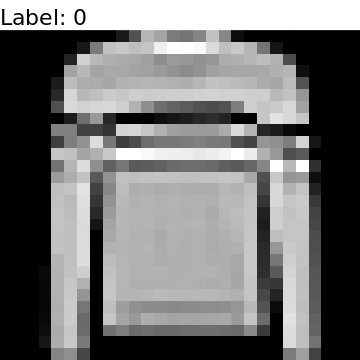

In [13]:
library(ggplot2)
library(reshape2)

index <- 1 # Changing the index will show you a different image in the data set

options(repr.plot.width = 3, repr.plot.height = 3)
ggplot(melt(t(apply(data_train$x[index,,], 2, rev)), varnames=c('x', 'y')), aes(x=x, y=y, fill=value)) +
    geom_raster() +
    scale_x_continuous(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_gradient(low="#000000", high="#FFFFFF") +
    theme_void() +
    theme(legend.position = "none") +
    ggtitle(paste('Label:', data_train$y[index]))
options(repr.plot.width = 6, repr.plot.height = 5)

## Exercise 2
Divide the original training data 80%-20% between the new training and validation set. Make sure that you slice both the images and the labels, and verify the dimensions of the two sets using `dim` and `length`.

**Hints**:
1. You will need four variables for storing the images and labels of your two sets.
1. Think carefully about the dimensions of the data, and how it affects the slicing.

In [14]:
index <- 0.8 * length(data_train$y)
dim(data_train$y)
x_val <- data_train$x[-(1:index),,]
y_val <- data_train$y[-(1:index)]

dim(x_val)
dim(y_val)

x_train <- data_train$x[1:index,,]
y_train <- data_train$y[1:index]

dim(x_train)
dim(y_train)

[1] 12000

[1] 2400   28   28

[1] 2400

[1] 9600   28   28

[1] 9600

## Exercise 3
The input images have pixel values that are not in the range 0 to 1. Rescale the images in the training and validation sets such that all values are in this range.

**Hints**:
1. Use R's `min` and `max` functions to find out the minimum and maximum.
1. **If you are unable to solve this exercise, please continue with the next one, where we have done it for you.**

In [15]:
min(x_train)
max(x_train)
x_train <- x_train / 255  # these are images in the range 0 to 255, so we can just divide by 255
x_val <- x_val / 255 # same for the validation set

[1] 0

[1] 255

## Run the cell below only if you did not complete exercise 2 and/or 3
If you couldn't slice the training and validation set yourself and/or normalise it, please run the following code to make sure you have the preprocessed data ready. If not, please continue to the next cell.

In [16]:
data <- dataset_fashion_mnist_binary()
data_train <- data$train
data_test <- data$test

# Slice the data

index <- 0.8 * length(data_train$y)
dim(data_train$y)
x_val <- data_train$x[-(1:index),,]
y_val <- data_train$y[-(1:index)]

dim(x_val)
dim(y_val)

x_train <- data_train$x[1:index,,]
y_train <- data_train$y[1:index]

dim(x_train)
dim(y_train)

# Normalise

x_train <- x_train / 255  # Normalise the image values between 0 and 1
x_val <- x_val / 255

[1] 12000

[1] 2400   28   28

[1] 2400

[1] 9600   28   28

[1] 9600

## Exercise 4
Create an initial model by filling out the skeleton below. We have provided you with the first layer. The first layer is a **flatten** layer, which will convert the two-dimensional 28 x 28 image into a one-dimensional vector of length 784.

Add a hidden layer with 4 neurons with ReLU activation, and an output layer with one neuron with sigmoid activation. Print a summary of the model and verify the output shapes of each layer.

**Hint**: you can keep the first notebook open as a reference.

In [17]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 4, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_1 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 4)                       3140        
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       5           
Total params: 3,145
Trainable params: 3,145
Non-trainable params: 0
________________________________________________________________________________



## Exercise 5
Compile the model by filling out the skeleton below according to the following requirements:
1. The optimizer should be `optimizer_adam` with learning rate 0.001
1. The loss should be `binary_crossentropy`
1. The metric should be accuracy (warning: Keras expects a character vector)

**Hint**: it may help to keep the previous notebook open for reference.

In [18]:
model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

## Exercise 6
Fit the model and plot the training history by filling out the skeleton below. Use 250 epochs.

Do you think the model has sufficient capacity to model the problem. Why or why not? Motivate your answer in a few sentences in the second cell.

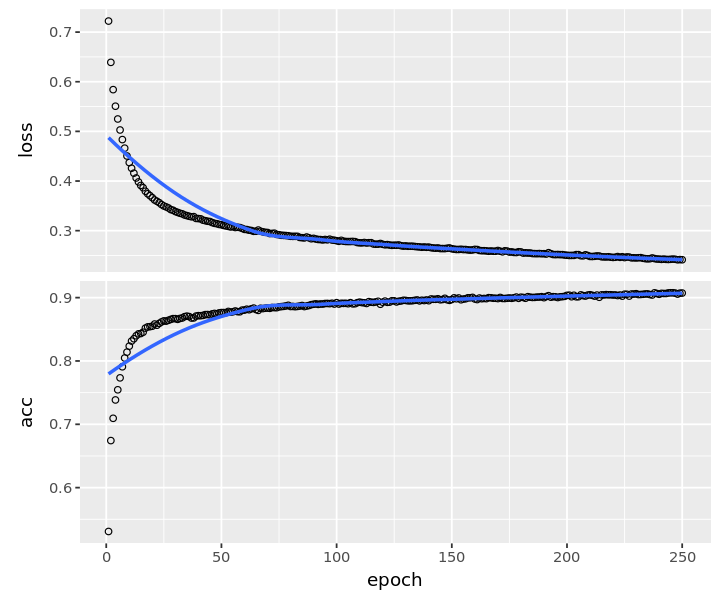

In [19]:
history <- model %>% fit(
    x = x_train,
    y = y_train,
    epochs = 250,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

In [20]:
# Answer:
# Even after a few hundred epochs the model is nowhere near zero loss. Most likely our model does not have enough
# capacity to solve the problem.

## Exercise 7
Add the validation set to your training process and increase the model's capacity by adding more neurons and/or layers. Make sure that the model has enough capacity to solve the problem. We have provided you with a skeleton to fill out below. You can modify the learning rate, number of epochs and the network architecture yourself.

Where does the model start overfitting? Motivate your answer in the second cell below as a comment.

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_2 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dense_4 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dense_5 (Dense)                     (None, 1)                       129         
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
________________________________________________________________________________


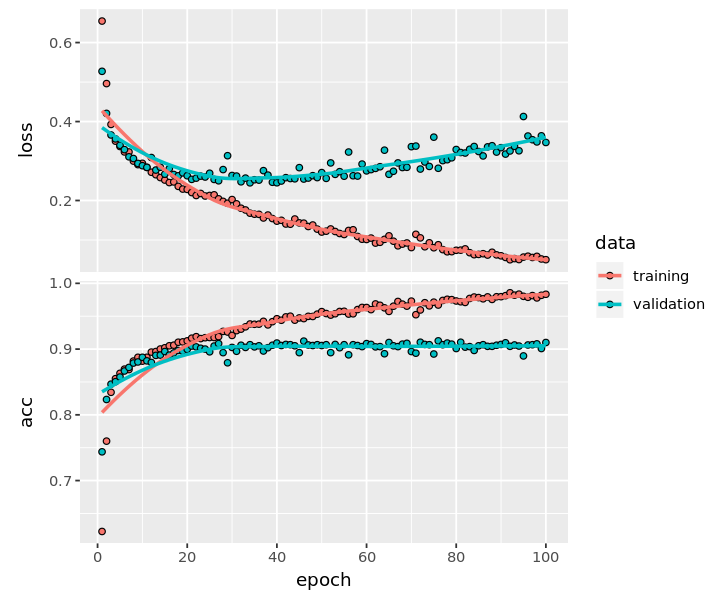

In [21]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 256, activation = "relu") %>%
    layer_dense(units = 128, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 100,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

In [22]:
# Answer:
# Given this particular model, overfitting starts to occur around epoch 40. At that point the loss of the validation
# set starts to exceed the loss on the training set. Look at the point at which the validation loss starts to increase
# again to find out the answer for your model.

Let's **evaluate** our model on the test set to obtain a final estimate of our model's performance. We need to rescale the test set's images based on the range from our training images. It was 0 to 255, as you may remember.

After rescaling, we evaluate using the [`evaluate`](https://tensorflow.rstudio.com/keras/reference/evaluate.html) function:

In [23]:
x_test <- data_test$x / 255
y_test <- data_test$y
model %>% evaluate(x_test, y_test)

$loss
[1] 0.4240413

$acc
[1] 0.8855

As you can see, the test set accuracy is comparable to the validation set accuracy. Although we could use the validation accuracy as a measure of how well we do on unseen the data, we still optimise our model on the validation set by adapting the hyperparameters ourselves. In this sense, the validation set is not truly unseen: we need to rely on the test set to give us a final verdict on the model's performance.

## Exercise 8: early stopping
Retrain the model from exercise 7. This time, set the number of epochs to the number of epochs at which the model started overfitting. Evaluate your model again.

What happens to the accuracy and loss compared to the model you trained before? Why? Motivate your answer in a few sentences in the second cell below.

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_3 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_6 (Dense)                     (None, 256)                     200960      
________________________________________________________________________________
dense_7 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dense_8 (Dense)                     (None, 1)                       129         
Total params: 233,985
Trainable params: 233,985
Non-trainable params: 0
________________________________________________________________________________


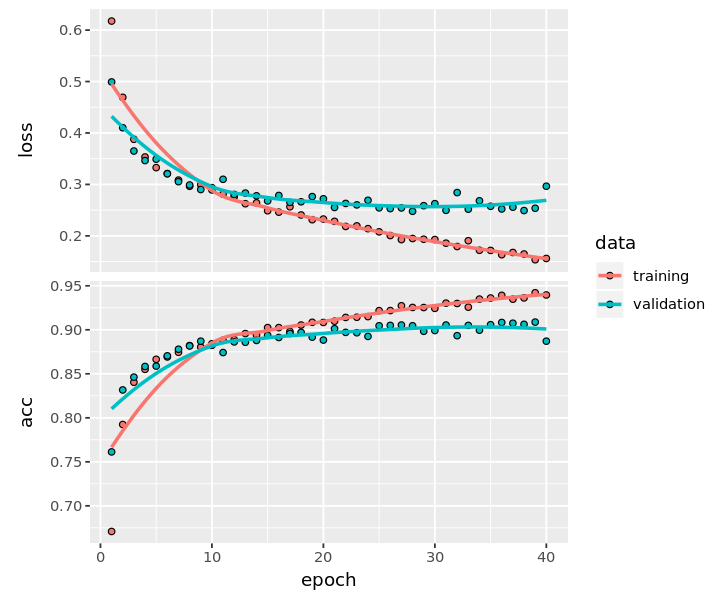

In [24]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 256, activation = "relu") %>%
    layer_dense(units = 128, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 40,
    batch_size = 1024,
    callbacks=list(Progress$new())
)
plot(history)

In [25]:
model %>% evaluate(x_test, y_test)

$loss
[1] 0.3457058

$acc
[1] 0.8685

In [26]:
# Answer:
# The accuracy of your model is not likely to change very much, as you could see in the accuracy curve of the 
# validation set of exercise 7. However, the loss on the validation set will be much lower than in your previous
# evaluation, because after the point at which we stop, it will start increasing again because of overfitting.

## Exercise 9: bonus
Decrease the batch size by factors of four, and inspect the resulting loss curves. What happens when you approach a batch size of 1? How do you explain this behaviour? Motivate your answer in a few sentences in the second cell below.

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_4 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_9 (Dense)                     (None, 2)                       1570        
________________________________________________________________________________
dense_10 (Dense)                    (None, 1)                       3           
Total params: 1,573
Trainable params: 1,573
Non-trainable params: 0
________________________________________________________________________________


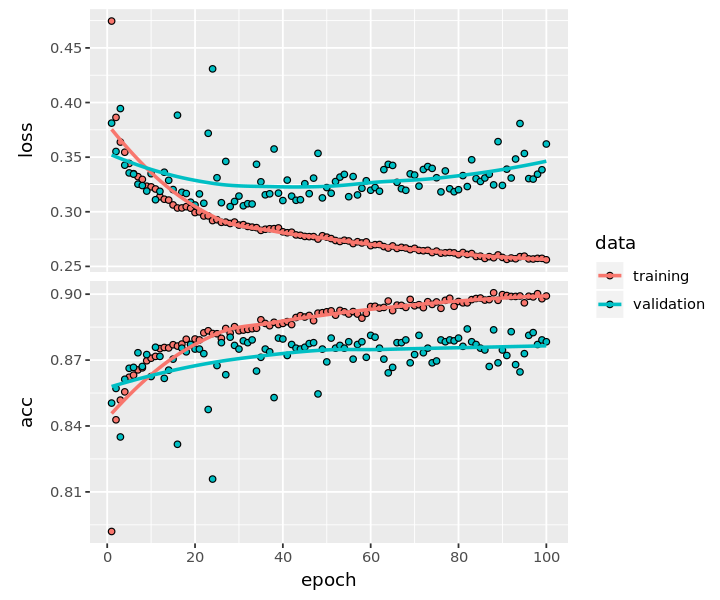

In [27]:
model <- keras_model_sequential() %>%
    layer_flatten(input_shape = c(28, 28)) %>%
    layer_dense(units = 2, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    x = x_train,
    y = y_train,
    validation_data = list(x_val, y_val),
    epochs = 100,
    batch_size = 1,
    callbacks=list(Progress$new())
)
plot(history)

In [28]:
# As the batch size approaches one, we estimate the gradient using fewer and fewer samples. As a result, it will be 
# less accurate and more noisy. This may actually help the model to escape problematic areas of the loss surface 
# (local minima), but will give a noisier loss curve. Every epoch we have many imprecise weight updates, which have 
# a large effect on the loss.